In [3]:
import pandas as pd
import numpy as np

In [4]:
df_red=pd.read_csv('wine+quality/winequality-red.csv')
df_white=pd.read_csv('wine+quality/winequality-white.csv')

In [5]:
df_red['label']=0
df_white['label']=1
df=pd.concat([df_red,df_white],ignore_index=True)

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

pca = PCA(n_components=2, random_state=42)
data_2d = pca.fit_transform(df.drop('label',axis=1))
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['label'])

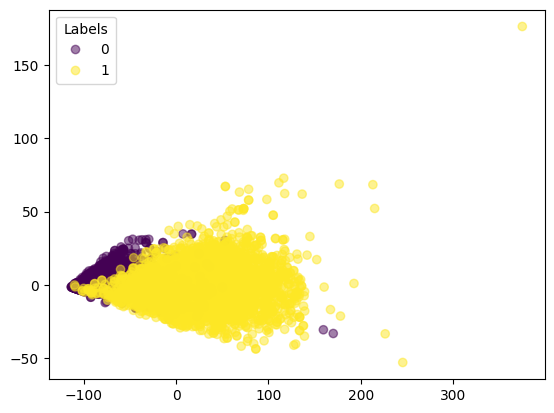

In [20]:
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=df['label'], cmap='viridis', alpha=0.5)
unique_labels = np.unique(df['label'])
label_names = label_encoder.inverse_transform(unique_labels)
legend = plt.legend(*scatter.legend_elements(), title='Labels')
legend.texts = [plt.Text(0, 0, name) for name in label_names]
plt.show()

In [11]:
# apply kmeans on this sampled points
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score
kmeans = KMeans(n_clusters=2, random_state=0)

In [22]:
rand_score(df["label"],kmeans.fit_predict(df.drop('label',axis=1)))

0.6630752655071571

In [25]:
# take a mean of all the pixel values and return 1x
df_grouped = df.mean()
df_grouped.drop('label', inplace=True)

In [26]:
# Sum of deviation from mean
df['deviation'] = df.drop('label', axis=1).apply(lambda x: np.sum(np.abs(x - df_grouped)**2), axis=1)
sum=df['deviation'].sum()
sum

22972202.73510993

In [28]:
# Defining m
m=600
q=[0 for i in range(6497)]
for i in range(6497):
    q[i]= 0.5*(df['deviation'][i]/sum + (1/70000))

weight=[0 for i in range(6497)]
for i in range(6497):
    weight[i]=1/(m*q[i])

In [29]:
df = df.drop('deviation',axis=1)

In [30]:
sampled_points = df.sample(n=m, weights=q, replace=True)
weight = [weight[i] for i in sampled_points.index]

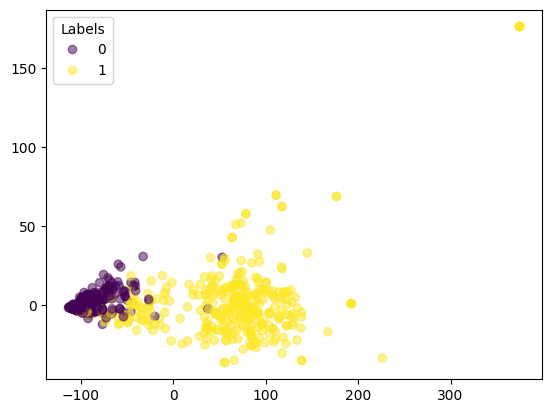

In [31]:
data_2d = pca.transform(sampled_points.drop('label',axis=1))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=sampled_points['label'], cmap='viridis', alpha=0.5)
unique_labels = np.unique(sampled_points['label'])
labels = label_encoder.transform(sampled_points['label'])
label_names = label_encoder.inverse_transform(unique_labels)
legend = plt.legend(*scatter.legend_elements(), title='Labels')
legend.texts = [plt.Text(0, 0, name) for name in label_names]
plt.show()

In [32]:
rand_score(kmeans.fit_predict(sampled_points.drop('label', axis=1),sample_weight=weight),sampled_points['label'])

0.8117362270450751

In [33]:
rand_score(kmeans.predict(df.drop('label', axis=1)),df['label'])

0.590627656114114

In [1]:
def leverage_sampling(data, red_size):
	print("svd started")
	u, s, v = np.linalg.svd(data.drop('label',axis=1), full_matrices=False)
	print("svd done")
	N = data.shape[0]
	norms = np.zeros(N)
	for j in range(N):
		norms[j]=np.linalg.norm(u[j,:])**2
	norms = norms/norms.sum()
	reduced_set = np.random.choice(N, size=red_size, p=norms)
	return reduced_set

In [9]:
coreset_ind = leverage_sampling(df,600)
coreset = df.iloc[coreset_ind]
coreset

svd started
svd done


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
3301,6.5,0.27,0.19,4.20,0.046,6.0,114.0,0.99550,3.25,0.35,8.600000,4,1
5629,6.9,0.19,0.38,1.15,0.023,30.0,105.0,0.99047,3.11,0.38,11.400000,5,1
3075,7.1,0.85,0.49,8.70,0.028,40.0,184.0,0.99620,3.22,0.36,10.700000,5,1
6454,7.1,0.23,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,1
5940,7.4,0.27,0.52,15.70,0.054,36.0,139.0,0.99788,3.04,0.62,10.033333,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5862,7.0,0.55,0.05,8.00,0.036,19.0,164.0,0.99269,3.26,0.46,12.200000,6,1
3586,8.1,0.22,0.28,7.70,0.043,57.0,176.0,0.99540,3.12,0.55,10.000000,5,1
3747,7.1,0.33,0.64,13.20,0.056,12.0,105.0,0.99720,3.05,0.39,9.200000,5,1
4002,8.8,0.33,0.36,2.10,0.034,19.0,125.0,0.99166,2.96,0.98,12.700000,6,1


In [12]:
rand_score(kmeans.fit_predict(coreset.drop('label', axis=1)),coreset['label'])

0.7021758486366165

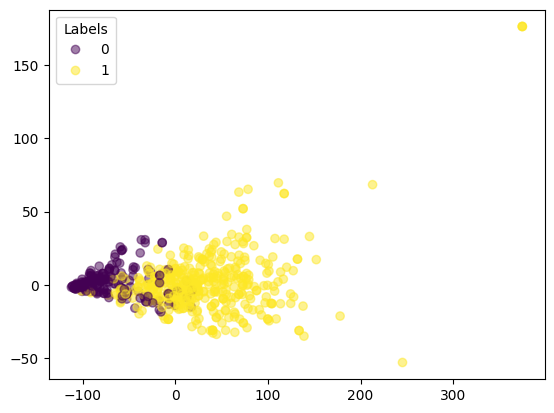

In [14]:
data_2d = pca.transform(coreset.drop('label',axis=1))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=coreset['label'], cmap='viridis', alpha=0.5)
unique_labels = np.unique(coreset['label'])
labels = label_encoder.transform(coreset['label'])
label_names = label_encoder.inverse_transform(unique_labels)
legend = plt.legend(*scatter.legend_elements(), title='Labels')
legend.texts = [plt.Text(0, 0, name) for name in label_names]
plt.show()

In [20]:
def projection(A,S):
	mat = A[S,:]
	u, s, v = np.linalg.svd(mat, full_matrices=False)
	print("svd done")
	component = (np.dot(u.T, np.dot(u, A.T))).T
	ans = A - component
	return ans

def union_a_b(S,t):
	for ele in t:
		if ele not in S:
			S.append(ele)
	return S

def volume_samp(A,s):
	t=2 #steps
	E=A
	m,n=A.shape
	S= []
	P=[0 for i in range(m)]

	for j in range(t):
		den = (np.linalg.norm(E))**2
		T=[]  
		for i in range(m):
			P[i] = (np.linalg.norm(E[i,:])**2)/den

		a=[i for i in range(len(A))] 
		T_index = np.random.choice(a, size = s//t, replace = False, p=P)
		S = union_a_b(S,T_index)
		if j<t-1:
			E = projection(A,S)
	return S

In [21]:
coreset_ind = volume_samp(df.drop('label',axis=1).values,600)

svd done


In [22]:
coreset = df.iloc[coreset_ind]
coreset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
2214,7.5,0.230,0.68,11.00,0.047,37.0,133.0,0.99780,2.99,0.38,8.80,5,1
2530,6.4,0.260,0.43,12.60,0.033,64.0,230.0,0.99740,3.08,0.38,8.90,5,1
3075,7.1,0.850,0.49,8.70,0.028,40.0,184.0,0.99620,3.22,0.36,10.70,5,1
3412,7.2,0.150,0.38,1.20,0.038,18.0,110.0,0.99170,3.19,0.43,11.10,6,1
5304,7.5,0.240,0.31,13.10,0.050,26.0,180.0,0.99884,3.05,0.53,9.10,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6391,4.7,0.785,0.00,3.40,0.036,23.0,134.0,0.98981,3.53,0.92,13.80,6,1
5440,6.6,0.210,0.50,8.70,0.036,41.0,191.0,0.99294,2.96,0.56,11.00,6,1
5110,6.5,0.190,0.28,1.40,0.046,22.0,90.0,0.99038,3.18,0.51,11.70,7,1
6388,5.5,0.620,0.33,1.70,0.037,24.0,118.0,0.98758,3.15,0.39,13.55,6,1


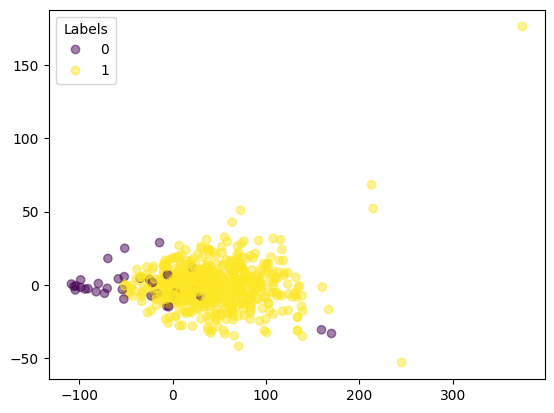

In [23]:
data_2d = pca.transform(coreset.drop('label',axis=1))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=coreset['label'], cmap='viridis', alpha=0.5)
unique_labels = np.unique(coreset['label'])
labels = label_encoder.transform(coreset['label'])
label_names = label_encoder.inverse_transform(unique_labels)
legend = plt.legend(*scatter.legend_elements(), title='Labels')
legend.texts = [plt.Text(0, 0, name) for name in label_names]
plt.show()

In [24]:
rand_score(kmeans.fit_predict(coreset.drop('label', axis=1)),coreset['label'])

0.4993139803581745